In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

In [0]:
#generating data

sample_n = 200
features_n = 2
iterations = 10
clusters = 3

points = np.random.uniform(0, 20, (sample_n, features_n))
samples = tf.constant(points)
initial_centroids = tf.slice(tf.random.shuffle(samples), [0,0], [clusters, -1])

x = samples[0]

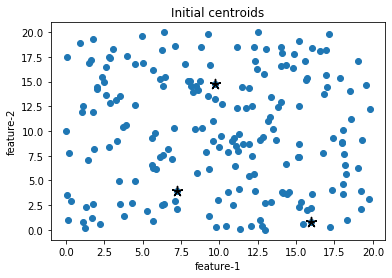

In [3]:
X = points[:,0]
y = points[:,1]

plt.scatter(X,y)

sess = tf.Session()
with sess.as_default():
  cent = initial_centroids.eval()
  X1 = cent[:,0]
  y1 = cent[:,1]
  plt.scatter(X1, y1, s=100, color='black', marker=(5,2))
  plt.title('Initial centroids')
  plt.xlabel('feature-1')
  plt.ylabel('feature-2')
  plt.show()

In [5]:
print('Sample Shape: ', samples.shape)
print('Shape of Centroids: ', initial_centroids.shape)

samples_exp = tf.expand_dims(samples, 0)
centroids_exp = tf.expand_dims(initial_centroids, 1)

print('Expanded Sample Shape: ', samples_exp.shape)
print('Expanded Shape of Centroids: ', centroids_exp.shape)

Sample Shape:  (200, 2)
Shape of Centroids:  (3, 2)
Expanded Sample Shape:  (1, 200, 2)
Expanded Shape of Centroids:  (3, 1, 2)


In [6]:
#finding distances
samples_exp.dtype
subb = tf.subtract(centroids_exp, samples_exp) #broadcasting
print(subb.shape)
sq = tf.square(subb)
print(sq.shape)
distance = tf.reduce_sum(sq, 2)
print(distance.shape)
IND1 = tf.argmin(distance, 0)
print(IND1.shape)

(3, 200, 2)
(3, 200, 2)
(3, 200)
(200,)


In [0]:
def update_centroids(samples_n, IND, cluster_n):
  IND2 = tf.cast(IND, 'int32')
  partitions = tf.dynamic_partition(samples_n, IND, cluster_n)
  new_centroids = tf.concat([tf.expand_dims(tf.reduce_mean(partition, 0), 0) for partition in partitions], 0)
  return new_centroids

In [9]:
iteration = 1

while (True):
  
  if iteration == 1:
    centroids_exp = tf.expand_dims(initial_centroids, 1)
  else:
    centroids_exp = tf.expand_dims(Centroids, 1)
    
  subb = tf.subtract(centroids_exp, samples_exp)
  sq = tf.square(subb)
  distance = tf.reduce_mean(sq, 2)
  IND1 = tf.argmin(distance, 1)
  updated_centroids = update_centroids(samples, IND1, clusters)
  model = tf.global_variables_initializer()
  
  with tf.Session() as session:
    sample_values = session.run(samples)
    updated_centroid_values = session.run(updated_centroids)
    print(updated_centroid_values)
    
  Centroid_prev = tf.squeeze(centroids_exp)
  diff_0 = tf.subtract(Centroid_prev[0], updated_centroid_value[0])
  Diff_0 = tf.norm(diff_0, ord='eculidean')
  
  diff_1 = tf.subtract(Centroid_prev[1], updated_centroid_value[1])
  Diff_1 = tf.norm(diff_1, ord='eculidean')
  
  diff_2 = tf.subtract(Centroid_prev[2], updated_centroid_value[2])
  Diff_2 = tf.norm(diff_2, ord='eculidean')
  
  with sess.as_default():
    Diff_0 = Diff_0.eval()
    Diff_1 = Diff_1.eval()
    Diff_2 = Diff_2.eval()
    
    Diff = Diff_1 + Diff_2 + Diff_0
    print(Diff)
    if Diff < 0.01:
      Index = IND1
      break
    else:
      Centroids = updated_centroid_value
      itetration += 1
      
  print('Total Iteration: ', iterations)

TypeError: ignored